In [1]:
import pandas as pd
import numpy as np
import sklearn

In [12]:
%matplotlib inline

In [2]:
df = pd.read_excel('data/Subway & SRT Logs (Jan01_14 to June 30_17).xlsx')

In [3]:
df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386


In [4]:
codes = pd.read_excel('data/Subway & SRT Log Codes.xlsx')

In [5]:
codes.head()

,Unnamed: 0,Unnamed: 1,SUB RMENU CODE,CODE DESCRIPTION,Unnamed: 4,Unnamed: 5,SRT RMENU CODE,CODE DESCRIPTION.1
0,NaN,1,EUAC,Air Conditioning,NaN,1.0,ERAC,Air Conditioning
1,NaN,2,EUAL,Alternating Current,NaN,2.0,ERBO,Body
2,NaN,3,EUBK,Brakes,NaN,3.0,ERCD,Consequential Delay (2nd Delay Same Fault)
3,NaN,4,EUBO,Body,NaN,4.0,ERCO,Couplers
4,NaN,5,EUCA,Compressed Air,NaN,5.0,ERDB,Disc Brakes


In [6]:
df.shape

(72218, 10)

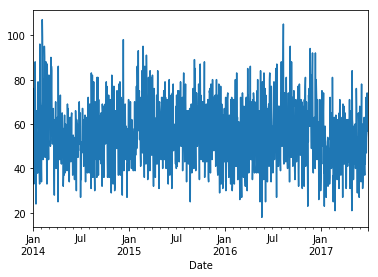

In [21]:
df.set_index('Date').groupby(pd.Grouper(freq='D'))['Vehicle'].count().plot()

In [15]:
df.dtypes

Date         datetime64[ns]
Time                 object
Day                  object
Station              object
Code                 object
Min Delay             int64
Min Gap               int64
Bound                object
Line                 object
Vehicle               int64
dtype: object

In [17]:
df['Date'].astype('str')

0        2014-01-01
1        2014-01-01
2        2014-01-01
3        2014-01-01
4        2014-01-01
5        2014-01-01
6        2014-01-01
7        2014-01-01
8        2014-01-01
9        2014-01-01
10       2014-01-01
11       2014-01-01
12       2014-01-01
13       2014-01-01
14       2014-01-01
15       2014-01-01
16       2014-01-01
17       2014-01-01
18       2014-01-01
19       2014-01-01
20       2014-01-01
21       2014-01-01
22       2014-01-01
23       2014-01-01
24       2014-01-01
25       2014-01-01
26       2014-01-01
27       2014-01-01
28       2014-01-01
29       2014-01-01
            ...    
72188    2017-06-30
72189    2017-06-30
72190    2017-06-30
72191    2017-06-30
72192    2017-06-30
72193    2017-06-30
72194    2017-06-30
72195    2017-06-30
72196    2017-06-30
72197    2017-06-30
72198    2017-06-30
72199    2017-06-30
72200    2017-06-30
72201    2017-06-30
72202    2017-06-30
72203    2017-06-30
72204    2017-06-30
72205    2017-06-30
72206    2017-06-30


In [19]:
df['datetime'] = pd.to_datetime(df['Date'].astype('str') + ' ' + df['Time'])

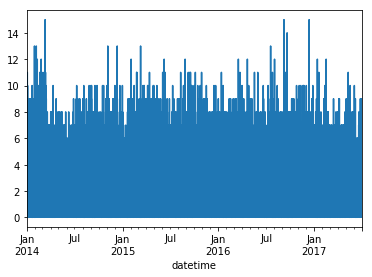

In [23]:
df.set_index('datetime').groupby(pd.Grouper(freq='H'))['Vehicle'].count().plot()

In [24]:
df.set_index('datetime').groupby(pd.Grouper(freq='15min'))['Vehicle'].count()

datetime
2014-01-01 00:15:00    1
2014-01-01 00:30:00    0
2014-01-01 00:45:00    0
2014-01-01 01:00:00    0
2014-01-01 01:15:00    0
2014-01-01 01:30:00    0
2014-01-01 01:45:00    0
2014-01-01 02:00:00    1
2014-01-01 02:15:00    0
2014-01-01 02:30:00    1
2014-01-01 02:45:00    0
2014-01-01 03:00:00    1
2014-01-01 03:15:00    2
2014-01-01 03:30:00    0
2014-01-01 03:45:00    0
2014-01-01 04:00:00    0
2014-01-01 04:15:00    0
2014-01-01 04:30:00    0
2014-01-01 04:45:00    0
2014-01-01 05:00:00    0
2014-01-01 05:15:00    0
2014-01-01 05:30:00    0
2014-01-01 05:45:00    0
2014-01-01 06:00:00    0
2014-01-01 06:15:00    0
2014-01-01 06:30:00    0
2014-01-01 06:45:00    0
2014-01-01 07:00:00    0
2014-01-01 07:15:00    0
2014-01-01 07:30:00    4
                      ..
2017-06-30 16:30:00    0
2017-06-30 16:45:00    0
2017-06-30 17:00:00    1
2017-06-30 17:15:00    2
2017-06-30 17:30:00    1
2017-06-30 17:45:00    0
2017-06-30 18:00:00    0
2017-06-30 18:15:00    0
2017-06-30 18:30

In [37]:
x = df.set_index('datetime').groupby(pd.Grouper(freq='D'))['Vehicle'].transform(lambda x: x.index)
x.index = df.index

In [38]:
dfx

0       2014-01-01 00:21:00
1       2014-01-01 02:06:00
2       2014-01-01 02:40:00
3       2014-01-01 03:10:00
4       2014-01-01 03:20:00
5       2014-01-01 03:29:00
6       2014-01-01 07:31:00
7       2014-01-01 07:32:00
8       2014-01-01 07:34:00
9       2014-01-01 07:34:00
10      2014-01-01 07:53:00
11      2014-01-01 08:20:00
12      2014-01-01 08:48:00
13      2014-01-01 08:49:00
14      2014-01-01 08:53:00
15      2014-01-01 08:55:00
16      2014-01-01 08:58:00
17      2014-01-01 09:00:00
18      2014-01-01 09:00:00
19      2014-01-01 09:01:00
20      2014-01-01 09:10:00
21      2014-01-01 09:23:00
22      2014-01-01 09:27:00
23      2014-01-01 09:32:00
24      2014-01-01 09:38:00
25      2014-01-01 09:38:00
26      2014-01-01 10:25:00
27      2014-01-01 10:52:00
28      2014-01-01 11:04:00
29      2014-01-01 11:20:00
                ...        
72188   2017-06-30 13:42:00
72189   2017-06-30 13:57:00
72190   2017-06-30 14:06:00
72191   2017-06-30 14:35:00
72192   2017-06-30 1